In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

In [ ]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
ytrain[0]

5

In [ ]:
import matplotlib.pyplot as plt

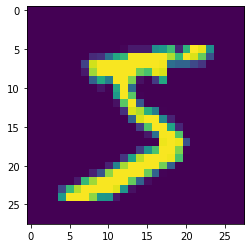

In [ ]:
plt.imshow(xtrain[0])

In [ ]:
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
xtrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))

model.add(Dense(12,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(xtrain,ytrain,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3291 - accuracy: 0.9031 - val_loss: 0.1740 - val_accuracy: 0.9477
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1337 - accuracy: 0.9603 - val_loss: 0.1174 - val_accuracy: 0.9668
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0907 - accuracy: 0.9722 - val_loss: 0.1151 - val_accuracy: 0.9672
Epoch 4/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0691 - accuracy: 0.9793 - val_loss: 0.1051 - val_accuracy: 0.9678
Epoch 5/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0535 - accuracy: 0.9831 - val_loss: 0.0952 - val_accuracy: 0.9737
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0422 - accuracy: 0.9870 - val_loss: 0.0992 - val_accuracy: 0.9723
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0363 - accuracy: 0.9876 - val_loss: 0.1005 - val_accurac

In [ ]:
yprob=model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [ ]:
yprob[0]

array([7.77252427e-21, 1.37521965e-14, 1.11218483e-16, 1.91529063e-12,
       1.10257375e-25, 3.92492238e-17, 1.01904205e-31, 9.99999940e-01,
       4.92675059e-17, 8.50302706e-16], dtype=float32)

In [ ]:
ypred=yprob.argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.99      0.96      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.96      0.98      0.97       892
           6       0.98      0.97      0.98       958
           7       0.96      0.97      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
ytest[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
ypred[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])